# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in a context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * What are some basic statistics you can learn right away about this dataset?

The Problem -> This is a dataset for about 54K diamonds with their price and each attribute that directly or inversely 
               affects its price. I chose this dataset as it seems to be a good regression tasks. Also few features are highly
               correlated than others. As market demand makes diamonds so valuable and a way of investment, from the point of 
               view of a Diamond retailer, I would like to predict the price of a diamond given few of the attributes that are
               present in this dataset.

URL-> https://www.kaggle.com/shivam2503/diamonds

How big is your dataset? (in terms of MB)-> 3 MB ( 3117 KB )

How many entries does it have? -> 53940 entries

How many features does it have? -> 10 features (12 columns)
(But one column works is like index so dropped it while cleaning the dataset, so 9 features excluding all encoding)

What are some basic statistics you can learn right away about this dataset? -> 
There is no blank or nulls in this dataset. We have 3 different categorical features, namely- Cut, Clarity and Color. 
Hence encoding is required. Also, each feature has different scales and ranges, so dataset needs to be scaled before we
train our model with it. And features like carat and measurements(x,y,z) are highly correlated with the price of the diamond. 
x is for length, y is for width and z is for depth. These features seems to be promising for contributing highly to the price of
the diamond.

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = ""; # required url to download for CSV file. The TA will download and run your program.
diamonddata = pd.read_csv("diamonds.csv")
print('How big is your dataset? (in terms of MB)')
print ((os.path.getsize("diamonds.csv") >> 20),'MB','(',(os.path.getsize("diamonds.csv") >> 10),'KB',')')

How big is your dataset? (in terms of MB)
3 MB ( 3117 KB )


In [2]:
diamonddata.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamonddata.isna().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [5]:
diamonddata.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [6]:
corr_matrix = diamonddata.corr()
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
Unnamed: 0   -0.306873
Name: price, dtype: float64

---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B60E40F860>,
      dtype=object)

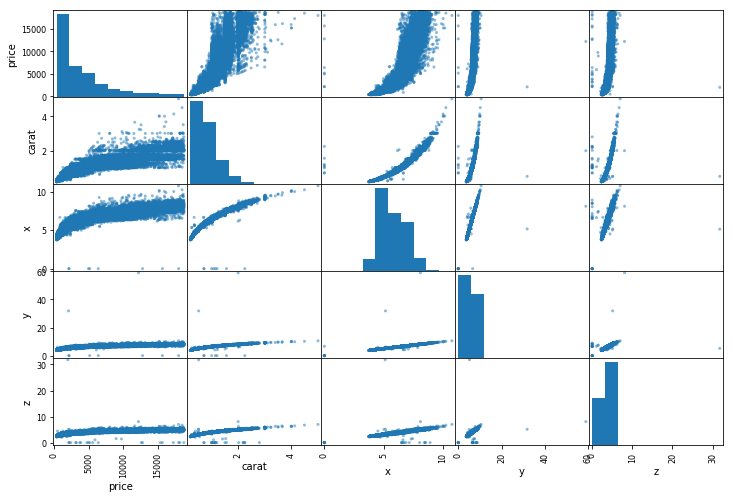

In [7]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

attributes = ["price", "carat", "x","y","z"]
scatter_matrix(diamonddata[attributes], figsize=(12, 8))

In [8]:
# Your code goes here for this section.
diamonddata_x = diamonddata
diamonddata_x = diamonddata_x.drop(["price"],axis = 1)
diamonddata_y = diamonddata["price"]
X_train, X_test, y_train, y_test = train_test_split(diamonddata_x, diamonddata_y, test_size=0.40)
X_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
26577,26578,2.01,Ideal,I,SI1,64.8,62.0,7.92,7.82,5.10
15931,15932,1.01,Premium,G,VVS2,61.9,58.0,6.48,6.38,3.98
37542,37543,0.39,Ideal,F,VVS2,61.6,55.0,4.71,4.74,2.91
27267,27268,2.12,Very Good,F,SI2,60.6,58.0,8.27,8.32,5.03
15568,15569,1.01,Premium,F,VS2,62.3,58.0,6.34,6.40,3.97


In [9]:
def dataCleaningScaling(X,Y):
    scaleStandard = StandardScaler()
    X = X.drop(["Unnamed: 0"],axis = 1)
    diamond_cut = X[['cut']]
    diamonddata_cut_encoded = pd.get_dummies(diamond_cut)
    diamond_color =  X[['color']]
    diamond_clarity =  X[['clarity']]
    diamonddata_color_encoded = pd.get_dummies(diamond_color)
    diamonddata_clarity_encoded = pd.get_dummies(diamond_clarity)
    X = X.drop(["cut","color","clarity"], axis=1)
    X = X.join(diamonddata_cut_encoded)
    X = X.join(diamonddata_color_encoded)
    X = X.join(diamonddata_clarity_encoded)
    X = scaleStandard.fit_transform(X)
    X = np.c_[np.ones((X.shape[0], 1)), X]
    Y=Y.as_matrix()
    Y=Y.reshape(Y.shape[0],1)
    return X,Y

In [10]:
X_train,y_train=dataCleaningScaling(X_train,y_train)

C:\Users\Oindrila\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [11]:
X_test,y_test=dataCleaningScaling(X_test,y_test)

C:\Users\Oindrila\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. You should write code to implement the **MyLinearRegression** class and its predefined methods:

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [12]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
    def __int__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0; # learning rate
        self.cost  = 0; # cost function
  
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        costHistory=[]
        thetaHistory=[]
        self.alpha = [0.001,0.01,0.1,0.2]
        #self.alpha=[0.1]
        iters = 1000
        for i in range(len(self.alpha)):
            self.theta = np.random.randn(X_train.shape[1],1)
            theta1,cost1=self.gradientDescent(X_train, y_train, self.theta, self.alpha[i],iters)
            costHistory.append(cost1)
            thetaHistory.append(theta1)
        return thetaHistory,costHistory
        
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here
        #self.theta = 0
        #print ("alpha",alpha)
        self.cost = 0
        cost_iter = [0] * iters
        m = len(y_train)
    
        for i in range(iters):
            h = X_train.dot(theta)                                          # Values of the Hypothesis
            loss = h - y_train                                              # Difference between the Hypothesis and the Y_train
            gradients = 2/m * X_train.T.dot(loss) 
            theta = theta - alpha * gradients                               # Changing Values of theta
            cost = self.computeCostFunc(X_train, y_train, theta)            # New Cost Value
            cost_iter[i] = cost
            #if(i%100==0):
             #   print ("iteration",i)
        return theta,cost_iter
    
    def computeCostFunc(self, X_train, y_train, theta): 
        # compute the cost function 
        #implementation code here
        #self.theta = 0
        m = len(y_train)
        rmse = np.sqrt(sum((X_train.dot(theta) - y_train) ** 2) / m)
        return rmse
    
    def predict(self, X_test,theta):
        # implementation code here 
        y_predict=X_test.dot(theta)
        return y_predict
    
    def fitUsingNormalEquation(self, X_train, y_train):
        # implementation code here
        self.theta = 0
        #X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        mul=X_train.T.dot(X_train)
        theta=np.linalg.inv(mul).dot(X_train.T).dot(y_train)
        return theta
    

In [13]:
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
Theta,Cost=myGradientDescentModel.fitUsingGradientDescent(X_train, y_train) 

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

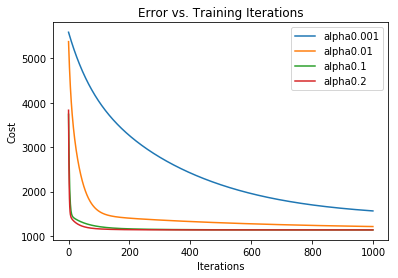

In [14]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#
# plt.set_xlabel('Iterations')  
# plt.set_ylabel('Cost')  
# plt.set_title('Error vs. Training Iterations')  
Iterations=1000
alpha=[0.001,0.01,0.1,0.2]
iters=[0] * Iterations
for i in range(Iterations):
    iters[i]=i
plt.xlabel('Iterations')  
plt.ylabel('Cost')
plt.title('Error vs. Training Iterations')
for i in range(len(Cost)):
    plt.plot(iters, Cost[i],label='alpha'+str(alpha[i]))
    plt.legend()
plt.show()

So from the graph we can conclude that alpha for values 0.1 and 0.2 converges fastest. Hence have the fastest learning rate with minimum cost. So we select alpha=0.2 for predicting our Y for the test set, which is at the 3rd index and use the corresponding weights.

In [15]:
y_predictTrain=myGradientDescentModel.predict(X_train,Theta[3])
y_predictTest=myGradientDescentModel.predict(X_test,Theta[3])

In [16]:
costGradient=myGradientDescentModel.computeCostFunc(X_test, y_test, Theta[3])
costGradient

array([1121.31386519])

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [17]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
thetaNormal=myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

In [18]:
costNormal=myNormalEquationModel.computeCostFunc(X_train, y_train, thetaNormal)
costNormal

array([1151.57363081])

In [19]:
y_predictTrainNormal=myGradientDescentModel.predict(X_train,thetaNormal)
y_predictTestNormal=myGradientDescentModel.predict(X_test,thetaNormal)

In [20]:
costNormalTest=myNormalEquationModel.computeCostFunc(X_test, y_test, thetaNormal)
costNormalTest

array([1137.52612027])

- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [21]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)


myGradientDescentModel_rmse = np.sqrt(mean_squared_error(y_test, y_predictTest))
myNormalEquationModel_rmse = np.sqrt(mean_squared_error(y_test, y_predictTestNormal))

print('RMSE for each model -')
print('SGD Regressor -> ',mySGDModel_rmse)
print('My Gradient Descent Model -> ',float(costGradient))
print('My Normal Equation Mpdel -> ',float(costNormalTest))
print('Using Lib RMSE My Gradient Descent Model -> ',myGradientDescentModel_rmse)
print('Using Lib RMSE My Normal Equation Mpdel -> ',myNormalEquationModel_rmse)

RMSE for each model -
SGD Regressor ->  1128.4163012583672
My Gradient Descent Model ->  1121.3138651876982
My Normal Equation Mpdel ->  1137.526120269591
Using Lib RMSE My Gradient Descent Model ->  1121.3138651876961
Using Lib RMSE My Normal Equation Mpdel ->  1137.526120269591


C:\Users\Oindrila\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Oindrila\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


All the models perform more or less the same, having more or less the same accuracy. However the least cost is for My Gradient Descent Model where I used Batch gradient.
RMSE for each model -
SGD Regressor ->  1128.4163012583672
My Gradient Descent Model ->  1121.3138651876982
My Normal Equation Mpdel ->  1137.526120269591
The results seems to be good but maybe the error could be reduced through some other models which are yet to be explored.
Since all the 3 models here give comparable results, the error seems to be fine.

- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

# Your paragraph goes here for this section
How can you pitch your solution to this project?->
As our problem remains to predict the price of diamond with minimum error in our prediction, we could successfully establish our Gradient Descent model which uses Batch Descent. We could successfully get a cost of approx 1130 which is the minimum cost achieved amongst the 3 models used namely - Batch Gradient Descent, Stochastic Gradient Descent & Mini batch grdient descent.
We also discovered that the price of the diamond is directly proportional to that of the diamond's carat and the meaurement of each of it's dimension,i.e., length(x), width(y), & depth(z).

What did you learn so far about the problem?->
We have few categorical faetures like cut, clarity and color, which we were needed to encode so that we could predict the price of diamond without dropping any feature. Also we observed that the higher learning rate quickly converges and becomes constant after about the 600th iteration. So we have obtained a really good and fast learning rate.

Is there any insight moving forward to improve the solution.->
In this dataset we didn't drop any feature and tried predicting the price of the diamond. For a better accuracy and prediction we can always try to remove or drop attributes whose correlation with the price tends to zero. We may improve the solution and the accuracy.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 1:...".

Best of luck and have fun!